In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
import metpy.calc as mpcalc
from metpy.units import units
from numpy import *
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset, num2date
import math
import sys
from datetime import datetime, timedelta

import cdsapi
import os
os.chdir(  "/Users/etmu9498/research/code/scripts-winter2023")
import helper_fns_winter2023 as helper_fns
sys.path.append(  "/Users/etmu9498/research/code/scripts-winter2023/era5-processing")
import era_data_processing
import era_plotting

In [4]:
# load more 2021 and 2022 data from copernicus website!
era_data_processing.download_era5( year='2021', name = 'ida')

Loading SHIPS dataset
SHIPS dataset created
Number of lines in dataset: 1884145


2023-05-17 11:01:22,535 INFO Welcome to the CDS
2023-05-17 11:01:22,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-17 11:01:22,731 INFO Request is queued
2023-05-17 11:01:23,883 INFO Request is running
2023-05-17 11:01:25,533 INFO Request is completed
2023-05-17 11:01:25,533 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data4/adaptor.mars.internal-1684342864.2080865-10758-9-a148de31-71ac-4d62-bf94-61bab45c065b.nc to winds_20210826_12.nc (7.9M)
2023-05-17 11:01:28,345 INFO Download rate 2.8M/s                                                                      
2023-05-17 11:01:28,643 INFO Welcome to the CDS
2023-05-17 11:01:28,644 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210826_12.nc
Dataset 1/24 downloaded


2023-05-17 11:01:28,819 INFO Request is queued
2023-05-17 11:01:29,963 INFO Request is running
2023-05-17 11:01:31,607 INFO Request is completed
2023-05-17 11:01:31,607 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/adaptor.mars.internal-1684342870.155558-6458-18-75dcbc0c-b7e8-42bd-8773-750e4abe6312.nc to winds_20210826_18.nc (7.9M)
2023-05-17 11:01:34,293 INFO Download rate 3M/s                                                                        
2023-05-17 11:01:34,596 INFO Welcome to the CDS
2023-05-17 11:01:34,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210826_18.nc
Dataset 2/24 downloaded


2023-05-17 11:01:34,818 INFO Request is queued
2023-05-17 11:01:35,956 INFO Request is running
2023-05-17 11:01:37,612 INFO Request is completed
2023-05-17 11:01:37,612 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data8/adaptor.mars.internal-1684342876.097823-18827-17-c83e7098-9261-4478-9a7f-ceca98bc19ff.nc to winds_20210827_00.nc (7.9M)
2023-05-17 11:01:40,499 INFO Download rate 2.7M/s                                                                      
2023-05-17 11:01:40,800 INFO Welcome to the CDS
2023-05-17 11:01:40,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210827_00.nc
Dataset 3/24 downloaded


2023-05-17 11:01:41,015 INFO Request is queued
2023-05-17 11:01:42,169 INFO Request is running
2023-05-17 11:01:43,830 INFO Request is completed
2023-05-17 11:01:43,830 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data6/adaptor.mars.internal-1684342882.338828-9075-17-02d8998d-8795-4409-baa5-93b92b2770b7.nc to winds_20210827_06.nc (7.9M)
2023-05-17 11:01:46,072 INFO Download rate 3.5M/s                                                                      
2023-05-17 11:01:46,373 INFO Welcome to the CDS
2023-05-17 11:01:46,373 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210827_06.nc
Dataset 4/24 downloaded


2023-05-17 11:01:46,739 INFO Request is queued
2023-05-17 11:01:47,886 INFO Request is running
2023-05-17 11:01:49,541 INFO Request is completed
2023-05-17 11:01:49,542 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1684342887.9818423-23566-10-4f4c9133-fcd9-4d34-8303-414abfee3596.nc to winds_20210827_12.nc (7.9M)
2023-05-17 11:01:54,201 INFO Download rate 1.7M/s                                                                      
2023-05-17 11:01:54,552 INFO Welcome to the CDS


winds_20210827_12.nc
Dataset 5/24 downloaded


2023-05-17 11:01:54,554 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-17 11:01:54,721 INFO Request is queued
2023-05-17 11:01:55,870 INFO Request is running
2023-05-17 11:01:57,516 INFO Request is completed
2023-05-17 11:01:57,516 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data4/adaptor.mars.internal-1684342896.2768166-18497-6-cf21c68c-1541-4729-880d-269e943c67ac.nc to winds_20210827_18.nc (7.9M)
2023-05-17 11:02:00,428 INFO Download rate 2.7M/s                                                                      
2023-05-17 11:02:00,744 INFO Welcome to the CDS
2023-05-17 11:02:00,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210827_18.nc
Dataset 6/24 downloaded


2023-05-17 11:02:00,917 INFO Request is queued
2023-05-17 11:02:02,068 INFO Request is running
2023-05-17 11:02:03,733 INFO Request is completed
2023-05-17 11:02:03,734 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/adaptor.mars.internal-1684342902.3759565-12538-15-2a845324-9c0b-43c7-ba8a-94da5c6d03a8.nc to winds_20210828_00.nc (7.9M)
2023-05-17 11:02:06,546 INFO Download rate 2.8M/s                                                                      
2023-05-17 11:02:06,855 INFO Welcome to the CDS
2023-05-17 11:02:06,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210828_00.nc
Dataset 7/24 downloaded


2023-05-17 11:02:07,015 INFO Request is queued
2023-05-17 11:02:08,166 INFO Request is running
2023-05-17 11:02:09,817 INFO Request is completed
2023-05-17 11:02:09,817 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data6/adaptor.mars.internal-1684342908.3414612-23566-11-ed6a99e7-6881-4639-bae4-fd3b96005d3d.nc to winds_20210828_06.nc (7.9M)
2023-05-17 11:02:11,714 INFO Download rate 4.2M/s                                                                      
2023-05-17 11:02:12,022 INFO Welcome to the CDS
2023-05-17 11:02:12,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210828_06.nc
Dataset 8/24 downloaded


2023-05-17 11:02:12,176 INFO Request is queued
2023-05-17 11:02:13,354 INFO Request is running
2023-05-17 11:02:15,013 INFO Request is completed
2023-05-17 11:02:15,013 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/adaptor.mars.internal-1684342913.3408775-23296-13-98f9fcbb-1749-42ce-8933-14eb51163a28.nc to winds_20210828_12.nc (7.9M)
2023-05-17 11:02:16,904 INFO Download rate 4.2M/s                                                                      
2023-05-17 11:02:17,191 INFO Welcome to the CDS
2023-05-17 11:02:17,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210828_12.nc
Dataset 9/24 downloaded


2023-05-17 11:02:17,381 INFO Request is queued
2023-05-17 11:02:18,523 INFO Request is running
2023-05-17 11:02:20,246 INFO Request is completed
2023-05-17 11:02:20,246 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data9/adaptor.mars.internal-1684342918.5913749-14612-12-e8d305b4-1bf6-41c2-82e7-f78a4cfff16f.nc to winds_20210828_18.nc (7.9M)
2023-05-17 11:02:23,179 INFO Download rate 2.7M/s                                                                      


winds_20210828_18.nc
Dataset 10/24 downloaded


2023-05-17 11:02:23,604 INFO Welcome to the CDS
2023-05-17 11:02:23,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-17 11:02:23,872 INFO Request is queued
2023-05-17 11:02:25,090 INFO Request is running
2023-05-17 11:02:26,796 INFO Request is completed
2023-05-17 11:02:26,796 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data2/adaptor.mars.internal-1684342925.4604537-20851-10-2a9f1d63-82b7-49e0-ab72-f33cea70abaf.nc to winds_20210829_00.nc (7.9M)
2023-05-17 11:02:31,035 INFO Download rate 1.9M/s                                                                      


winds_20210829_00.nc
Dataset 11/24 downloaded


2023-05-17 11:02:31,455 INFO Welcome to the CDS
2023-05-17 11:02:31,456 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-17 11:02:31,731 INFO Request is queued
2023-05-17 11:02:32,932 INFO Request is running
2023-05-17 11:02:34,646 INFO Request is completed
2023-05-17 11:02:34,647 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1684342933.1412458-23844-12-690be069-d3d5-411e-9df4-7260b143ee7a.nc to winds_20210829_06.nc (7.9M)
2023-05-17 11:02:37,532 INFO Download rate 2.8M/s                                                                      
2023-05-17 11:02:37,939 INFO Welcome to the CDS


winds_20210829_06.nc
Dataset 12/24 downloaded


2023-05-17 11:02:37,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-17 11:02:38,199 INFO Request is queued
2023-05-17 11:02:39,350 INFO Request is running
2023-05-17 11:02:41,007 INFO Request is completed
2023-05-17 11:02:41,007 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data0/adaptor.mars.internal-1684342939.718677-30188-11-b337f34a-51b9-4f04-a79d-743241ea90d6.nc to winds_20210829_12.nc (7.9M)
2023-05-17 11:02:43,697 INFO Download rate 2.9M/s                                                                      
2023-05-17 11:02:44,002 INFO Welcome to the CDS
2023-05-17 11:02:44,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210829_12.nc
Dataset 13/24 downloaded


2023-05-17 11:02:44,180 INFO Request is queued
2023-05-17 11:02:45,326 INFO Request is running
2023-05-17 11:02:46,972 INFO Request is completed
2023-05-17 11:02:46,981 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/adaptor.mars.internal-1684342945.7761502-23949-10-b65f2438-562e-484f-87be-6f794beef136.nc to winds_20210829_18.nc (7.9M)
2023-05-17 11:02:51,395 INFO Download rate 1.8M/s                                                                      
2023-05-17 11:02:51,710 INFO Welcome to the CDS
2023-05-17 11:02:51,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210829_18.nc
Dataset 14/24 downloaded


2023-05-17 11:02:51,886 INFO Request is queued
2023-05-17 11:02:53,039 INFO Request is running
2023-05-17 11:02:54,700 INFO Request is completed
2023-05-17 11:02:54,702 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/adaptor.mars.internal-1684342953.2407985-28331-8-034a2650-0475-4358-a55d-1c59c2757166.nc to winds_20210830_00.nc (7.9M)
2023-05-17 11:02:58,559 INFO Download rate 2.1M/s                                                                      
2023-05-17 11:02:58,856 INFO Welcome to the CDS
2023-05-17 11:02:58,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210830_00.nc
Dataset 15/24 downloaded


2023-05-17 11:02:59,056 INFO Request is queued
2023-05-17 11:03:00,216 INFO Request is running
2023-05-17 11:03:01,866 INFO Request is completed
2023-05-17 11:03:01,868 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data3/adaptor.mars.internal-1684342960.3691232-1609-1-4579e7b5-cb9f-4bef-bb3c-df2f85449bd1.nc to winds_20210830_06.nc (7.9M)
2023-05-17 11:03:05,817 INFO Download rate 2M/s                                                                        
2023-05-17 11:03:06,115 INFO Welcome to the CDS
2023-05-17 11:03:06,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210830_06.nc
Dataset 16/24 downloaded


2023-05-17 11:03:06,289 INFO Request is queued
2023-05-17 11:03:07,443 INFO Request is running
2023-05-17 11:03:09,093 INFO Request is completed
2023-05-17 11:03:09,093 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/adaptor.mars.internal-1684342967.7084723-14354-15-4b4c29c8-1f90-4caa-b312-82d19377abaa.nc to winds_20210830_12.nc (7.9M)
2023-05-17 11:03:11,839 INFO Download rate 2.9M/s                                                                      
2023-05-17 11:03:12,141 INFO Welcome to the CDS
2023-05-17 11:03:12,141 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210830_12.nc
Dataset 17/24 downloaded


2023-05-17 11:03:12,327 INFO Request is queued
2023-05-17 11:03:13,469 INFO Request is running
2023-05-17 11:03:15,118 INFO Request is completed
2023-05-17 11:03:15,118 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/adaptor.mars.internal-1684342973.748803-32123-2-642d8981-deb1-4af8-8c4e-4c485d354485.nc to winds_20210830_18.nc (7.9M)
2023-05-17 11:03:17,001 INFO Download rate 4.2M/s                                                                      
2023-05-17 11:03:17,311 INFO Welcome to the CDS
2023-05-17 11:03:17,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210830_18.nc
Dataset 18/24 downloaded


2023-05-17 11:03:17,469 INFO Request is queued
2023-05-17 11:03:18,613 INFO Request is running
2023-05-17 11:03:20,273 INFO Request is completed
2023-05-17 11:03:20,273 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/adaptor.mars.internal-1684342978.6558523-29694-7-2fe98de7-b61c-4683-9180-88470c06e647.nc to winds_20210831_00.nc (7.9M)
2023-05-17 11:03:22,010 INFO Download rate 4.6M/s                                                                      
2023-05-17 11:03:22,305 INFO Welcome to the CDS
2023-05-17 11:03:22,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210831_00.nc
Dataset 19/24 downloaded


2023-05-17 11:03:22,478 INFO Request is queued
2023-05-17 11:03:23,632 INFO Request is running
2023-05-17 11:03:25,273 INFO Request is completed
2023-05-17 11:03:25,273 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data0/adaptor.mars.internal-1684342983.7784042-15706-3-57e5da2d-520a-47e6-8dfb-420017a31ce4.nc to winds_20210831_06.nc (7.9M)
2023-05-17 11:03:28,420 INFO Download rate 2.5M/s                                                                      


winds_20210831_06.nc
Dataset 20/24 downloaded


2023-05-17 11:03:29,466 INFO Welcome to the CDS
2023-05-17 11:03:29,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-17 11:03:29,626 INFO Request is queued
2023-05-17 11:03:30,783 INFO Request is running
2023-05-17 11:03:32,464 INFO Request is completed
2023-05-17 11:03:32,464 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data5/adaptor.mars.internal-1684342991.1125004-18761-1-483d8ef8-2c3f-474d-8190-507f80ead32d.nc to winds_20210831_12.nc (7.9M)
2023-05-17 11:03:35,212 INFO Download rate 2.9M/s                                                                      
2023-05-17 11:03:35,527 INFO Welcome to the CDS
2023-05-17 11:03:35,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210831_12.nc
Dataset 21/24 downloaded


2023-05-17 11:03:35,691 INFO Request is queued
2023-05-17 11:03:36,861 INFO Request is running
2023-05-17 11:03:38,513 INFO Request is completed
2023-05-17 11:03:38,513 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/adaptor.mars.internal-1684342997.021903-14434-4-b180d1d4-b8c6-4698-bac2-3687e1a7eeb4.nc to winds_20210831_18.nc (7.9M)
2023-05-17 11:03:41,363 INFO Download rate 2.8M/s                                                                      
2023-05-17 11:03:41,657 INFO Welcome to the CDS
2023-05-17 11:03:41,673 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210831_18.nc
Dataset 22/24 downloaded


2023-05-17 11:03:41,847 INFO Request is queued
2023-05-17 11:03:43,017 INFO Request is running
2023-05-17 11:03:44,686 INFO Request is completed
2023-05-17 11:03:44,688 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1684343003.3344767-31778-4-6a35b72b-f080-4927-a401-c8b8f439a815.nc to winds_20210901_00.nc (7.9M)
2023-05-17 11:03:46,478 INFO Download rate 4.4M/s                                                                      
2023-05-17 11:03:46,831 INFO Welcome to the CDS
2023-05-17 11:03:46,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


winds_20210901_00.nc
Dataset 23/24 downloaded


2023-05-17 11:03:46,993 INFO Request is queued
2023-05-17 11:03:48,147 INFO Request is running
2023-05-17 11:03:49,807 INFO Request is completed
2023-05-17 11:03:49,809 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data3/adaptor.mars.internal-1684343008.2856908-1796-13-7bf92417-8968-4085-a512-bdcfc895cfee.nc to winds_20210901_06.nc (7.9M)
2023-05-17 11:03:52,479 INFO Download rate 3M/s                                                                        


winds_20210901_06.nc
Dataset 24/24 downloaded


Loading SHIPS dataset
SHIPS dataset created
Number of lines in dataset: 1884145
[-63.1, -3.1000000000000014, -20.0, 40.0]
[-63.1, -3.1000000000000014, -20.0, 40.0]
Figure 1 created
[-64.4, -4.399999999999999, -19.8, 40.2]
[-64.4, -4.399999999999999, -19.8, 40.2]
Figure 2 created
[-66.0, -6.0, -19.6, 40.4]
[-66.0, -6.0, -19.6, 40.4]
Figure 3 created
[-67.6, -7.600000000000001, -19.3, 40.7]
[-67.6, -7.600000000000001, -19.3, 40.7]
Figure 4 created
[-69.0, -9.0, -19.1, 40.9]
[-69.0, -9.0, -19.1, 40.9]
Figure 5 created
[-70.3, -10.299999999999997, -18.9, 41.1]
[-70.3, -10.299999999999997, -18.9, 41.1]
Figure 6 created
[-71.6, -11.600000000000001, -18.6, 41.4]
[-71.6, -11.600000000000001, -18.6, 41.4]
Figure 7 created
[-73.0, -13.0, -18.4, 41.6]
[-73.0, -13.0, -18.4, 41.6]
Figure 8 created
[-74.3, -14.299999999999997, -18.1, 41.9]
[-74.3, -14.299999999999997, -18.1, 41.9]
Figure 9 created
[-75.4, -15.399999999999999, -17.7, 42.3]
[-75.4, -15.399999999999999, -17.7, 42.3]
Figure 10 created
[

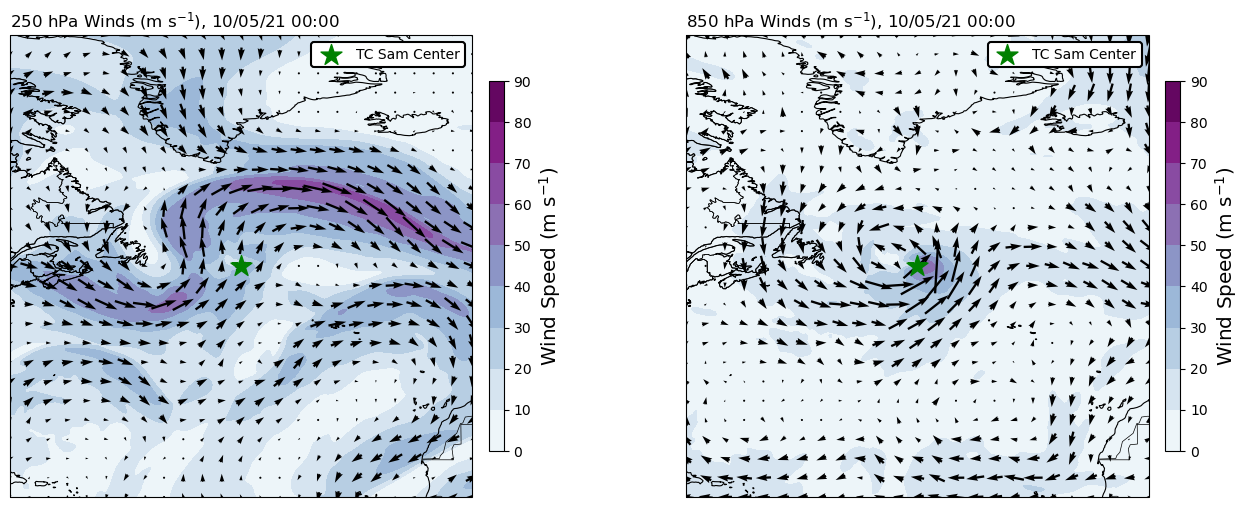

In [2]:
era_plotting.wind_plots(year='2021', name = 'sam', lat_spacing = 30, lon_spacing = 30, plot_type='all_speeds')